Categories of problems
1. time lag
    +6 min
    -6 min
    larger than 6 min
    smaller than -6 min
2. Vertical offset after time correction of 10 or more points
    +1 cm
    -1 cm
    +5 mm
    -5 mm
3. repeated points
    doccument how many?
4. NOAA gap fill
    any gap that NOAA has filled 30+ min


Switch to station datum

In [1]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates


In [2]:
p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
#p21_9300_LH = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Pier 21\Pier21_1993-2000_pwl_harmwl_bwl.csv')
p21_9300_LH.drop(labels=range(701280,701286),axis = 0, inplace = True)

p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
#p21_0112_LH = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Pier 21\Pier21_2001-2012_pwl_harmwl_bwl.csv')
p21_0112_LH.drop(labels=range(1051920,1051926), axis = 0, inplace=True)

p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')
#p21_1323_LH = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Pier 21\Pier21_2013-2023_pwl_harmwl_bwl.csv')
p21_1323_LH.drop(labels=range(len(p21_1323_LH)-6,len(p21_1323_LH)), axis=0, inplace=True)


C:\Users\rprocious\AppData\Local\Temp\ipykernel_41600\1002497903.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
C:\Users\rprocious\AppData\Local\Temp\ipykernel_41600\1002497903.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
C:\Users\rprocious\AppData\Local\Temp\ipykernel_41600\1002497903.py:9: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')


In [3]:
directory_path = '/Users/rprocious/Downloads/data/NOAA/pier21/'
#directory_path = r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\NOAA\pier21'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

p21_NOAA = pd.concat(dataframes, ignore_index=True)

In [4]:
frames = [p21_9300_LH,p21_0112_LH,p21_1323_LH]
p21_LH = pd.concat(frames, ignore_index=True)
p21_LH.head()

,#date+time,022-pwl,022-bwl,022-harmwl
0,01-01-1993 0000,1.491,1.733,1.453
1,01-01-1993 0006,1.491,NaN,1.456
2,01-01-1993 0012,1.496,NaN,1.458
3,01-01-1993 0018,1.503,NaN,1.461
4,01-01-1993 0024,1.512,NaN,1.464


In [5]:
p21_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
p21_NOAA.reset_index(drop = True, inplace=True)

In [6]:
p21_LH.drop(labels=range(0,262800),axis=0, inplace=True)
p21_LH.reset_index(drop=True, inplace=True)
p21_LH.head()

,#date+time,022-pwl,022-bwl,022-harmwl
0,01-01-1996 0000,1.634,1.911,1.550
1,01-01-1996 0006,1.648,NaN,1.549
2,01-01-1996 0012,1.657,NaN,1.547
3,01-01-1996 0018,1.664,NaN,1.546
4,01-01-1996 0024,1.654,NaN,1.545


In [7]:
comparison_df = pd.DataFrame()
comparison_df['Dates'] = p21_LH['#date+time']
comparison_df['Lighthouse WL'] = p21_LH['022-pwl']
comparison_df['NOAA WL'] = p21_NOAA[' Water Level']
comparison_df.head(10)

,Dates,Lighthouse WL,NOAA WL
0,01-01-1996 0000,1.634,1.634
1,01-01-1996 0006,1.648,1.648
2,01-01-1996 0012,1.657,1.657
3,01-01-1996 0018,1.664,1.664
4,01-01-1996 0024,1.654,1.654
5,01-01-1996 0030,1.647,1.647
6,01-01-1996 0036,1.66,1.660
7,01-01-1996 0042,1.655,1.655
8,01-01-1996 0048,1.652,1.652
9,01-01-1996 0054,1.627,1.627


In [8]:
comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()

C:\Users\rprocious\AppData\Local\Temp\ipykernel_41600\808919446.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
C:\Users\rprocious\AppData\Local\Temp\ipykernel_41600\808919446.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

,Dates,Lighthouse WL,NOAA WL
2454475,2023-12-31 23:30:00,1.547,1.548
2454476,2023-12-31 23:36:00,1.548,1.542
2454477,2023-12-31 23:42:00,1.542,1.553
2454478,2023-12-31 23:48:00,1.553,1.579
2454479,2023-12-31 23:54:00,1.579,1.580


(1.0, 2.0)

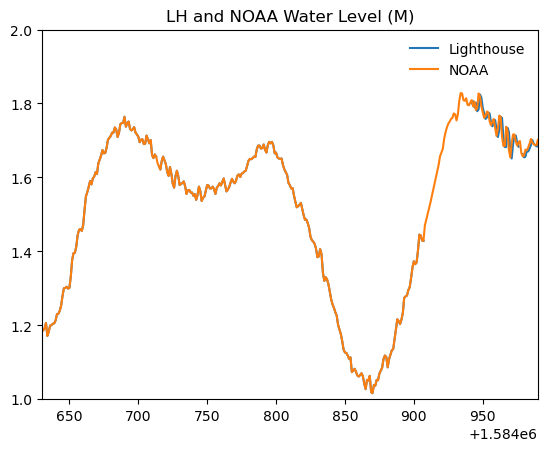

In [9]:
plt.plot(comparison_df['Lighthouse WL'], label = 'Lighthouse')

plt.plot(comparison_df['NOAA WL'], label = 'NOAA')
plt.title('LH and NOAA Water Level (M)')
plt.legend(frameon= False)
plt.xlim(1584630,1584990)
plt.ylim(1,2)

In [10]:
for i in range(len(comparison_df)):
    if comparison_df.loc[i]['Lighthouse WL'] != comparison_df.loc[i]['NOAA WL']:
        print(comparison_df.loc[i]['Dates'])
        break


1996-04-23 00:54:00


In [11]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)


In [12]:
comparison_df[1584907:1584947]

,Dates,Lighthouse WL,NOAA WL
1584907,2014-01-29 18:42:00,1.428,1.428
1584908,2014-01-29 18:48:00,NaN,1.470
1584909,2014-01-29 18:54:00,NaN,1.485
1584910,2014-01-29 19:00:00,NaN,1.500
1584911,2014-01-29 19:06:00,NaN,1.516
1584912,2014-01-29 19:12:00,NaN,1.531
1584913,2014-01-29 19:18:00,NaN,1.548
1584914,2014-01-29 19:24:00,NaN,1.565
1584915,2014-01-29 19:30:00,NaN,1.582
1584916,2014-01-29 19:36:00,NaN,1.599


Data coming back in from lighthouse looks to be off by 6 min and 0.003M offset

In [13]:
revised_LH = pd.DataFrame()
revised_LH['Adjusted LH WL'] = comparison_df['Lighthouse WL']
revised_LH.drop(1584941,axis = 0, inplace=True)
revised_LH.reset_index(drop = True, inplace=True)
comparison_df['Shifted LH WL'] = revised_LH['Adjusted LH WL']
comparison_df[1584837:1584947]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
1584837,2014-01-29 11:42:00,1.324,1.324,1.324
1584838,2014-01-29 11:48:00,1.311,1.311,1.311
1584839,2014-01-29 11:54:00,1.290,1.290,1.290
1584840,2014-01-29 12:00:00,1.270,1.270,1.270
1584841,2014-01-29 12:06:00,1.256,1.256,1.256
...,...,...,...,...
1584942,2014-01-29 22:12:00,1.800,1.809,1.806
1584943,2014-01-29 22:18:00,1.806,1.792,1.789
1584944,2014-01-29 22:24:00,1.789,1.805,1.802
1584945,2014-01-29 22:30:00,1.802,1.782,1.779


Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'LH and NOAA Water Level (M)')

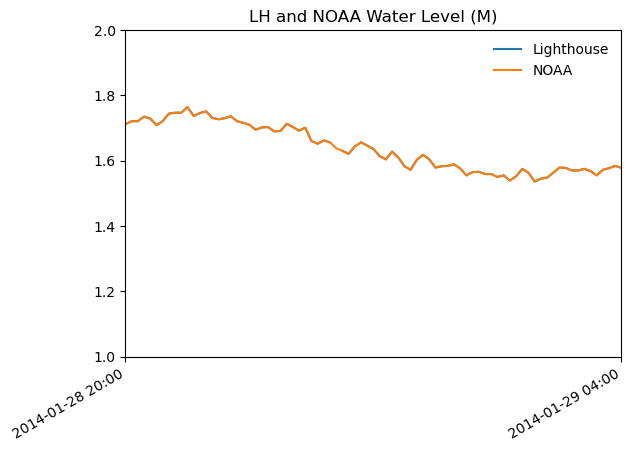

In [14]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1,2)

start_date = pd.to_datetime('2014-01-28 20:00')

end_date = pd.to_datetime('2014-01-29 04:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('LH and NOAA Water Level (M)')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'LH and NOAA Water Level (M)')

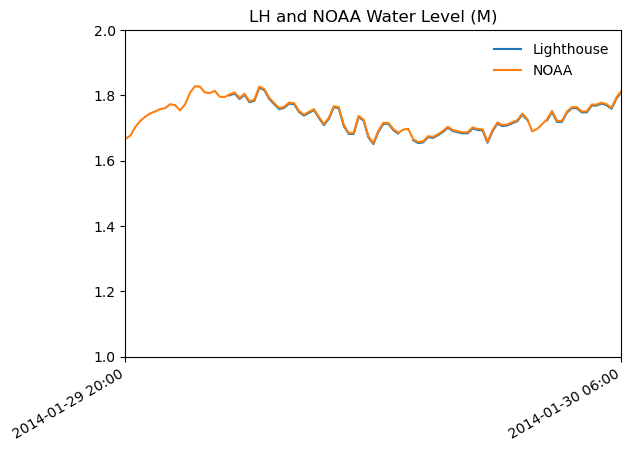

In [15]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1,2)

start_date = pd.to_datetime('2014-01-29 20:00')

end_date = pd.to_datetime('2014-01-30 06:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('LH and NOAA Water Level (M)')

In [16]:
differences = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']
non_zero_differences = differences != 0

filtered_differences = differences[non_zero_differences]
filtered_dates = comparison_df['Dates'][non_zero_differences]

# Convert the results to DataFrames
differences_df = filtered_differences.to_frame(name='Difference')
dates_df = filtered_dates.to_frame(name='Date')

# Combine the two DataFrames
remaining_differences = differences_df.join(dates_df, how='inner')

cleaned_remaining_differences = remaining_differences.dropna()
cleaned_remaining_differences.reset_index(drop = True, inplace=True)

cleaned_remaining_differences.to_clipboard()

Finds the Double points

In [17]:

mask = comparison_df['NOAA WL'] == comparison_df['NOAA WL'].shift(-1)

# Use the mask to filter the DataFrame and get the double values and dates
double_values = comparison_df.loc[mask, 'NOAA WL'].to_frame()
double_dates = comparison_df.loc[mask, 'Dates'].to_frame()

In [18]:
len(double_values)

91399

In [19]:
double_dates

,Dates
20,1996-01-01 02:00:00
31,1996-01-01 03:06:00
41,1996-01-01 04:06:00
49,1996-01-01 04:54:00
50,1996-01-01 05:00:00
...,...
2454324,2023-12-31 08:24:00
2454341,2023-12-31 10:06:00
2454348,2023-12-31 10:48:00
2454397,2023-12-31 15:42:00


In [20]:
comparison_df[19:32]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
19,1996-01-01 01:54:00,1.658,1.658,1.658
20,1996-01-01 02:00:00,1.644,1.644,1.644
21,1996-01-01 02:06:00,1.644,1.644,1.644
22,1996-01-01 02:12:00,1.648,1.648,1.648
23,1996-01-01 02:18:00,1.670,1.670,1.670
24,1996-01-01 02:24:00,1.680,1.680,1.680
25,1996-01-01 02:30:00,1.685,1.685,1.685
26,1996-01-01 02:36:00,1.688,1.688,1.688
27,1996-01-01 02:42:00,1.676,1.676,1.676
28,1996-01-01 02:48:00,1.687,1.687,1.687


Filters the differences to anything greater than 0.005

In [21]:
mask = abs(cleaned_remaining_differences['Difference']) >= 0.005

cleaned_remaining_differences = cleaned_remaining_differences[mask]

len(cleaned_remaining_differences)

249768

In [22]:
for i in range(1, 11):
    cleaned_remaining_differences[f'Next_{i}'] = cleaned_remaining_differences['Difference'].shift(-i)

# Check if the current value is equal to the next 10 values
cleaned_remaining_differences['All_Next_10_Equal'] = cleaned_remaining_differences.apply(lambda row: all(row['Difference'] == row[f'Next_{i}'] for i in range(1, 11)), axis=1)

# Drop the helper columns if they are no longer needed
cleaned_remaining_differences.drop(columns=[f'Next_{i}' for i in range(1, 11)], inplace=True)


In [23]:
false_count = cleaned_remaining_differences['All_Next_10_Equal'].value_counts()[False]
false_count

141818

Drops all false values

In [24]:
mask = cleaned_remaining_differences['All_Next_10_Equal'] == True

# Filter the DataFrame using the mask
cleaned_remaining_differences = cleaned_remaining_differences[mask]

# Reset index if needed
cleaned_remaining_differences.reset_index(drop=True, inplace=True)


In [25]:
cleaned_remaining_differences

,Difference,Date,All_Next_10_Equal
0,-0.006,2009-07-14 10:48:00,True
1,-0.005,2011-10-11 14:18:00,True
2,-0.005,2011-10-11 14:30:00,True
3,-0.005,2011-10-11 15:18:00,True
4,-0.005,2011-10-11 15:24:00,True
...,...,...,...
107945,-0.021,2023-05-29 17:30:00,True
107946,-0.021,2023-05-29 17:36:00,True
107947,-0.021,2023-05-29 17:42:00,True
107948,-0.021,2023-05-29 17:48:00,True


Looking in excell 
2009-07-14 10:48 -0.006 difference
2011-10-11 14:18 - 2011-11-01 08:06 -0.005 offset
2020-11-16 13:18 - 2023-04-27 13:42 -0.01 offset
2023-04-28 16:48 - 2023-04-30 20:24 0.008 offset
2023-05-09 00:54 - 2023-05-29 17:54 -0.21 offset

Looking further at the data in july for 2007 there are offsets everhwehre that arent equal correction will be close to impossible

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.006 Offset')

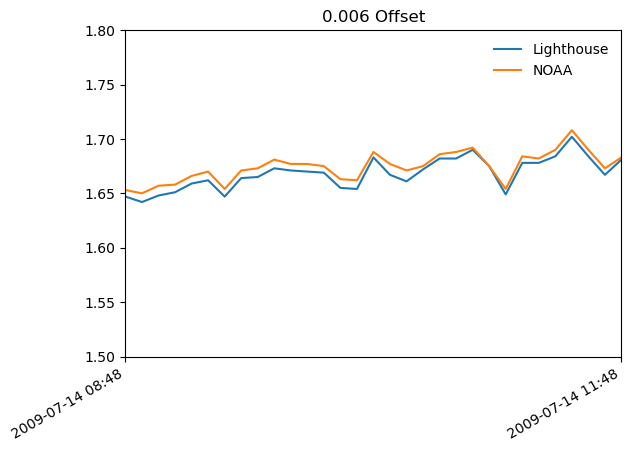

In [26]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,1.8)

start_date = pd.to_datetime('2009-07-14 08:48')

end_date = pd.to_datetime('2009-07-14 11:48')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.006 Offset')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.005 Offset Begining')

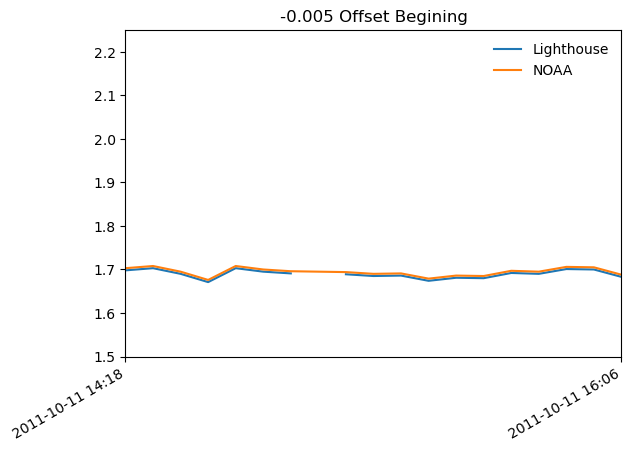

In [27]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2.25)

start_date = pd.to_datetime('2011-10-11 14:18')

end_date = pd.to_datetime('2011-10-11 16:06')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.005 Offset Begining')

Once again looking at the data in an excell spreadsheet the values are all over the place 

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.005 Offset Ending')

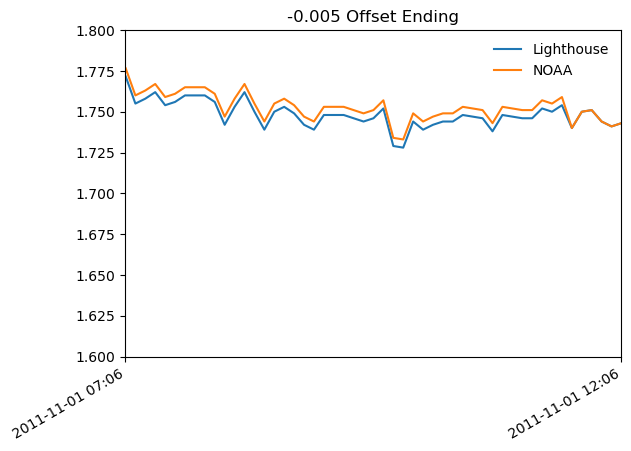

In [28]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.6,1.8)

start_date = pd.to_datetime('2011-11-01 07:06')

end_date = pd.to_datetime('2011-11-01 12:06')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.005 Offset Ending')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.01 Offset Begining')

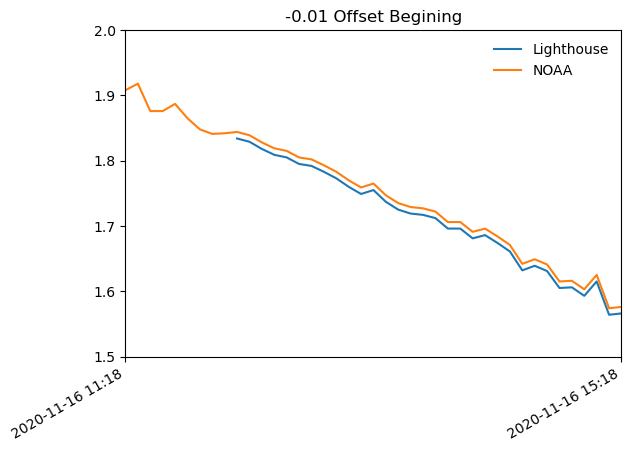

In [29]:

plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2)

start_date = pd.to_datetime('2020-11-16 11:18')

end_date = pd.to_datetime('2020-11-16 15:18')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.01 Offset Begining')

No Idea what is happening here

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.01 Offset Ending')

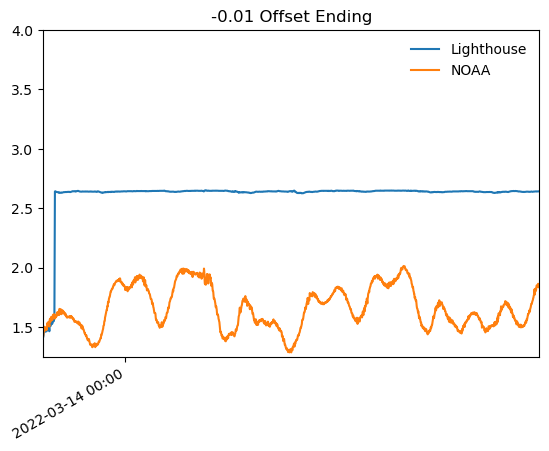

In [30]:

plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.25,4)

start_date = pd.to_datetime('2022-03-12 17:00')

end_date = pd.to_datetime('2022-03-20 12:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.01 Offset Ending')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.008 Offset Begining')

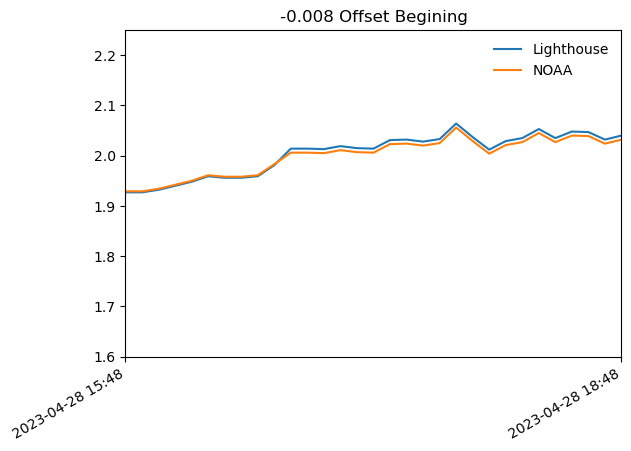

In [31]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.6,2.25)

start_date = pd.to_datetime('2023-04-28 15:48')

end_date = pd.to_datetime('2023-04-28 18:48')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.008 Offset Begining')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.008 Offset Ending')

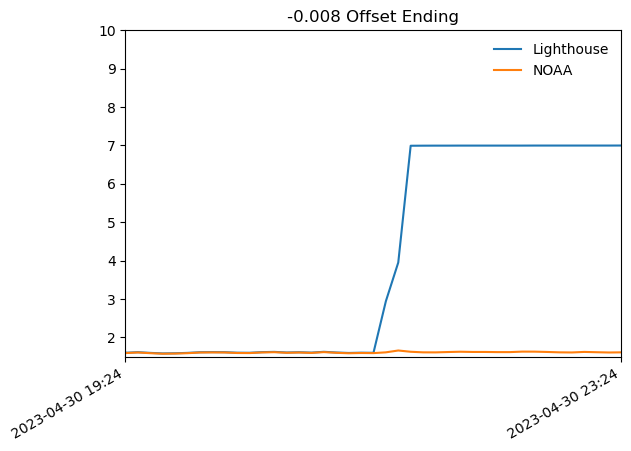

In [32]:

plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,10)

start_date = pd.to_datetime('2023-04-30 19:24')

end_date = pd.to_datetime('2023-04-30 23:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.008 Offset Ending')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.021 Offset Begining')

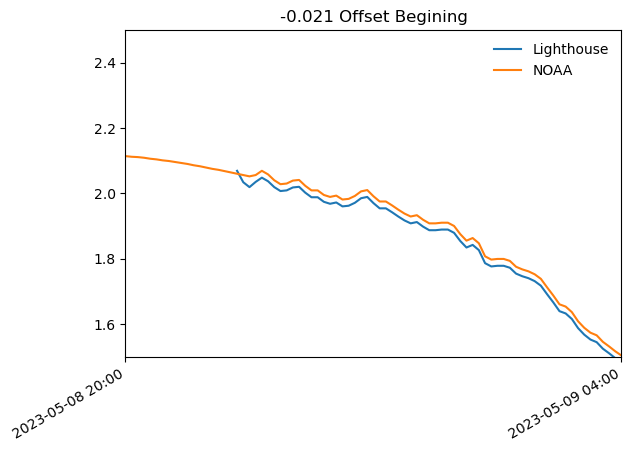

In [33]:


plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2.5)

start_date = pd.to_datetime('2023-05-08 20:00')

end_date = pd.to_datetime('2023-05-09 04:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.021 Offset Begining')


Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.021 Offset Ending')

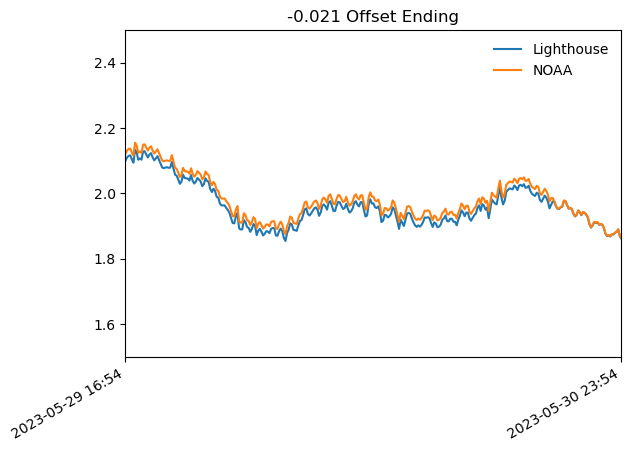

In [34]:



plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2.5)

start_date = pd.to_datetime('2023-05-29 16:54')

end_date = pd.to_datetime('2023-05-30 23:54')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.021 Offset Ending')


Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


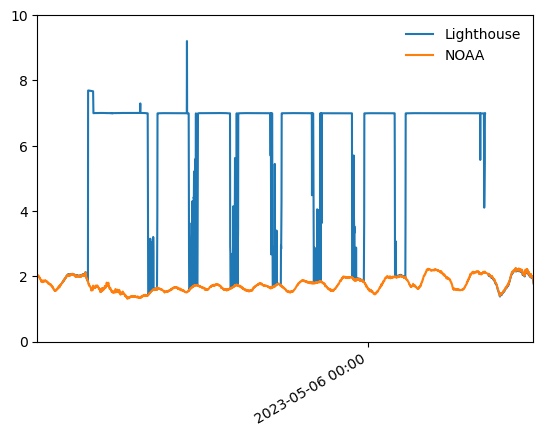

In [35]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(0,10)

start_date = pd.to_datetime('2023-04-28 00:00')

end_date = pd.to_datetime('2023-05-10 00:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)


Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


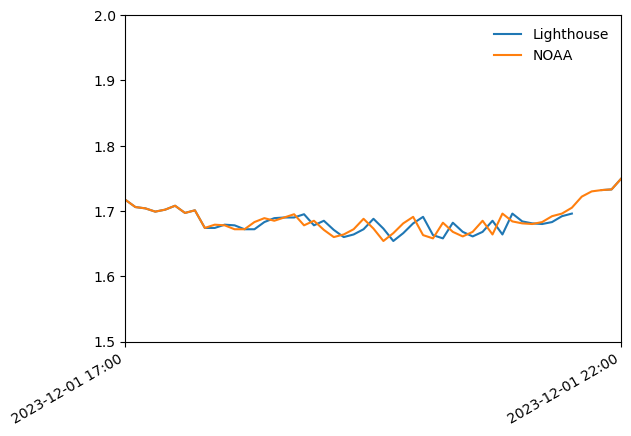

In [36]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2)

start_date = pd.to_datetime('2023-12-01 17:00')

end_date = pd.to_datetime('2023-12-01 22:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)


In [37]:
date_index_locater('2020-11-16 13:18','2020-11-16 13:18')

[2180773]

In [38]:
comparison_df[2447200:2447230]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
2447200,2023-12-01 16:00:00,1.765,1.760,1.760
2447201,2023-12-01 16:06:00,1.760,1.752,1.752
2447202,2023-12-01 16:12:00,1.752,1.734,1.734
2447203,2023-12-01 16:18:00,1.734,1.730,1.730
2447204,2023-12-01 16:24:00,1.730,1.735,1.735
2447205,2023-12-01 16:30:00,1.735,1.741,1.741
2447206,2023-12-01 16:36:00,1.741,1.728,1.728
2447207,2023-12-01 16:42:00,1.728,1.720,1.728
2447208,2023-12-01 16:48:00,1.728,1.713,1.720
2447209,2023-12-01 16:54:00,1.720,1.700,1.700


In [39]:

end_dates = ['2009-07-14 10:42','2011-10-11 14:12','2020-11-16 12:06','2023-04-28 16:42','2023-05-08 21:42','2023-05-09 00:48']

nan_counts = {}

for end_date in end_dates:
    end_index = comparison_df[comparison_df['Dates'] == end_date].index[0]
    start_index = comparison_df.loc[:end_index, 'Shifted LH WL'].last_valid_index()
    
    # Count the NaNs in the gap
    nan_count = comparison_df.loc[start_index:end_index, 'Shifted LH WL'].isna().sum()
    
    # Store the count in the dictionary
    nan_counts[end_date] = nan_count
nan_counts

{'2009-07-14 10:42': 0,
 '2011-10-11 14:12': 7,
 '2020-11-16 12:06': 1160,
 '2023-04-28 16:42': 0,
 '2023-05-08 21:42': 18,
 '2023-05-09 00:48': 0}

Text(0.5, 1.0, 'Hist of NA Before Vertical Offset')

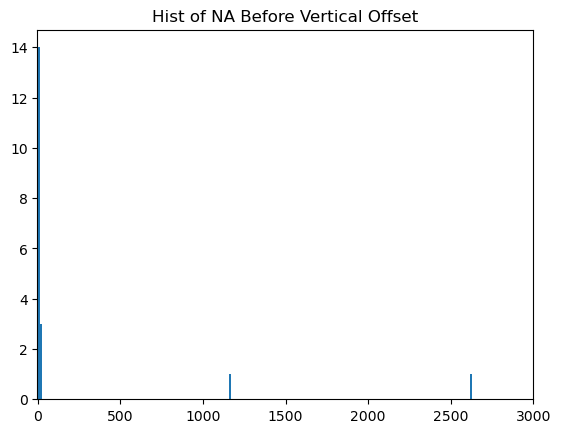

In [40]:
na_count = [0,7,0,0,0,0,22,13,24,0,0,0,9,0,0,3,2631,1160,18]
plt.hist(na_count, bins=200)
plt.xlim(-1,3000)
plt.title('Hist of NA Before Vertical Offset')

In [42]:
comparison_df['Differences'] = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']

In [57]:
date_locations = date_index_locater('2023-05-08 21:00','2023-05-09 00:54')
comparison_df[date_locations[0]:date_locations[-1]]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL,Differences
2397570,2023-05-08 21:00:00,NaN,2.090,NaN,NaN
2397571,2023-05-08 21:06:00,NaN,2.086,NaN,NaN
2397572,2023-05-08 21:12:00,NaN,2.083,NaN,NaN
2397573,2023-05-08 21:18:00,NaN,2.079,NaN,NaN
2397574,2023-05-08 21:24:00,NaN,2.075,NaN,NaN
2397575,2023-05-08 21:30:00,NaN,2.072,NaN,NaN
2397576,2023-05-08 21:36:00,NaN,2.068,NaN,NaN
2397577,2023-05-08 21:42:00,NaN,2.064,NaN,NaN
2397578,2023-05-08 21:48:00,NaN,2.060,2.069,0.009
2397579,2023-05-08 21:54:00,2.069,2.056,2.034,-0.022
